In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.svm import SVC, SVR # SVC support vector classifier, SVR support vector regressor
from sklearn.svm import LinearSVC, LinearSVR


In [3]:
import xgboost as xgb
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [4]:
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
import os

In [5]:
# Import data
X=pd.read_csv("Data preprocess/x.csv",header=0, index_col=0)
y=pd.read_csv("Data preprocess/y.csv",header=0, index_col=0)
y=pd.Series(y["Inflation"])

# only use data before Jan 2020
y=y.iloc[:-40]
X=X.iloc[:-40]
train_ratio=0.7
n_train = int(len(X)*0.7) #every 200 months as a training window
n_records = len(X)
n_forecast = n_records-n_train
train_ratio=0.7
y

sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2019-01-09    0.176366
2019-01-10    0.285350
2019-01-11    0.217068
2019-01-12    0.314861
2020-01-01    0.162657
Name: Inflation, Length: 333, dtype: float64

# ARIMA Model

In [6]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

p_values = range(0, 5)
q_values = range(0, 5) 
d_values = range(0, 5) 

Y = pd.Series(y)

Y_train = Y[:int(len(y)*train_ratio)]
Y_test = Y[int(len(y)*train_ratio):]

param_grid = list(itertools.product(p_values, d_values, q_values))

best_model = None
best_aic = np.inf
best_params = None

for params in param_grid:
    try:
        model = ARIMA(Y, order=params)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_model = model_fit
            best_params = params
    except:
        continue
        
print(best_model.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\us

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\us

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\us

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\us

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\us

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  333
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  21.805
Date:                Sat, 02 Dec 2023   AIC                            -33.609
Time:                        15:28:42   BIC                            -14.569
Sample:                             0   HQIC                           -26.017
                                - 333                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1859      0.019      9.897      0.000       0.149       0.223
ma.L1          0.4983      0.034     14.487      0.000       0.431       0.566
ma.L2          0.0222      0.053      0.416      0.6

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

#Predict variables using rolling window
n_train = int(len(y)*train_ratio)  # Number of training samples
n_records = len(Y)
forecasts = []
j = 0
train_errors = []

for i in range(n_train, n_records):
    train_data = Y[j:i]
    test_data = Y[i:i+1]

    #Fit the ARIMA model with the best parameters
    model = ARIMA(train_data, order=best_params)
    model_fit = model.fit()

    #Forecast using the ARIMA model
    forecast = model_fit.forecast(steps=1)
    forecasts.extend(forecast)
    
    train_error = np.abs(train_data[-1] - forecast)
    train_errors.append(train_error)

forecasts




C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

[0.16674154513516415,
 0.15276193998199428,
 0.22917509547463835,
 0.11386758810932703,
 0.28488181484529895,
 0.19950608679046283,
 0.18989431521503766,
 0.2048471634125806,
 -0.00892919631648273,
 0.16915157000761158,
 0.18638237106082725,
 0.41633034389090473,
 0.25762626561890606,
 0.15610789944475792,
 0.029219708767103558,
 0.18115178205596927,
 0.26201492458271736,
 0.3566689912829042,
 -0.12563532201189453,
 0.1204765384565051,
 0.2647240658593313,
 0.20117425028289024,
 0.21082716545507404,
 0.21980221420989088,
 0.10788012090611496,
 0.1687672997786458,
 0.23769750479739477,
 0.22255846197656057,
 0.207933336202701,
 0.14541574305781418,
 0.22766718331319455,
 0.1943070449573269,
 0.1887293466737873,
 0.17739418865004888,
 0.16709919609054863,
 0.11379396283088099,
 0.1539933595613404,
 0.13652693328383325,
 0.0425204038161478,
 0.03173976273595833,
 -0.13583738096414222,
 0.42774797007156123,
 0.21486678041406357,
 0.07835921203618776,
 0.33819051181027804,
 0.17869048653409

In [9]:
#Calculate the training error
mse = np.mean(np.square(train_errors))
ARIMA_train_error = np.sqrt(mse)


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


pd.options.display.max_rows=300
result3 = pd.DataFrame({'Actual inflation': Y_test, 'ARIMA Predicted inflation': forecasts}, columns=['Actual inflation', 'ARIMA Predicted inflation'])
result3

mse_regression = mean_squared_error(Y_test, forecasts)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)

r_squared_arima = r2_score(result3['Actual inflation'], result3['ARIMA Predicted inflation'])
print("R-squared:", r_squared_arima)
print(result3.corr())


Mean Squared Error: 0.034686757180428594
Root Mean Squared Error: 0.1862438111198023
R-squared: 0.05160684771473256
                           Actual inflation  ARIMA Predicted inflation
Actual inflation                   1.000000                   0.350341
ARIMA Predicted inflation          0.350341                   1.000000


# Linear Regression with Regularization

In [11]:
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 19, random_state=1)), 
               ('elasticnet', ElasticNet(alpha=0.4,l1_ratio=0, tol=0.5))
              ]

pipeline_final = Pipeline(steps_final)

In [12]:
start=time.time()    
   
n_train = int(len(X)*train_ratio)

n_records = len(X)

y_test_list = []
    
y_ols_pred_list = []

y_train_list = []

y_train_pred_list = []

j = 0


for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_ols_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)


    j += 1
    
end=time.time()
score_rmse = metrics.mean_squared_error(y_test_list, y_ols_pred_list, squared=False)
OLS_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)

print("Running Time:", end - start)
print("Test error:",score_rmse)
print("Train error:", OLS_train_error)

Running Time: 1.37601637840271
Test error: 0.1766143352487442
Train error: 0.2262786865248202


In [13]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual inflation': y[-n_forecast:], "ARIMA_Predicted":forecasts,'OLS_Predicted': y_ols_pred_list}, columns=['Actual inflation', "ARIMA_Predicted", 'OLS_Predicted'])
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted
sasdate,,,
2011-01-10,0.067498,0.166742,0.138459
2011-01-11,0.184614,0.152762,0.105109
2011-01-12,0.023768,0.229175,0.267577
2012-01-01,0.272049,0.113868,0.117714
2012-01-02,0.213517,0.284882,0.307406
2012-01-03,0.209128,0.199506,0.290604
2012-01-04,0.165941,0.189894,0.178040
2012-01-05,-0.207032,0.204847,0.184172
2012-01-06,-0.082670,-0.008929,0.074636


# SVM Regressor

In [14]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 14, random_state=1)),
               ('svr', LinearSVR(epsilon=0.15,C=19, dual=True, random_state=1, max_iter=1000000))
              ]

pipeline_final = Pipeline(steps_final)

In [15]:
start=time.time()    
   
n_train = int(len(X)*train_ratio)

n_records = len(X)

y_test_list = []
    
y_pred_list = []

y_train_pred_list = []

y_train_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
SVR_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)
end=time.time()

print("Running Time:", end - start)
print(score_rmse)
print(SVR_train_error)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Running Time: 117.70389819145203
0.18494028445633093
0.23846153362886655


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
pd.options.display.max_rows=300
result["SVR_Predicted"] = y_pred_list
result.index = pd.DatetimeIndex(result.index).strftime("%d-%y")
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted
sasdate,,,,
10-11,0.067498,0.166742,0.138459,0.194448
11-11,0.184614,0.152762,0.105109,0.239312
12-11,0.023768,0.229175,0.267577,0.322845
01-12,0.272049,0.113868,0.117714,0.150542
02-12,0.213517,0.284882,0.307406,0.347017
03-12,0.209128,0.199506,0.290604,0.286441
04-12,0.165941,0.189894,0.178040,0.242880
05-12,-0.207032,0.204847,0.184172,0.249461
06-12,-0.082670,-0.008929,0.074636,0.108259


# XGBoost

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

In [18]:
#Perform rolling window prediction
#Rolling window = 1
start=time.time()    

n_train = int(len(X)*train_ratio)

n_records = len(X)

y_XGB_test_list = []
    
y_XGB_pred_list = []

y_train_pred_list = []

y_train_list=[]

y_test_list = []

j = 0




pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

# Best parameters
best_params = {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

# Set the best parameters in the pipeline
pipeline_final.set_params(**best_params)

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_XGB_pred = model.predict(X_test)
    
    y_XGB_pred_list.extend(y_XGB_pred)
    
    y_XGB_test_list.extend(y_test)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)
    
    y_test_list.extend(y_test)

    j += 1

    
end=time.time()

print("Running Time:", end - start)

score_rmse = metrics.mean_squared_error(y_test_list, y_XGB_pred_list, squared=False)
XGB_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)

Running Time: 11.967674016952515


In [19]:
print(score_rmse,XGB_train_error)
pd.options.display.max_rows=300
result["XGBoost_Predicted"] = y_XGB_pred_list

result

0.2440267825820499 0.25223809566184263


,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted
sasdate,,,,,
10-11,0.067498,0.166742,0.138459,0.194448,0.323451
11-11,0.184614,0.152762,0.105109,0.239312,0.247382
12-11,0.023768,0.229175,0.267577,0.322845,0.322988
01-12,0.272049,0.113868,0.117714,0.150542,0.270481
02-12,0.213517,0.284882,0.307406,0.347017,0.366068
03-12,0.209128,0.199506,0.290604,0.286441,0.316455
04-12,0.165941,0.189894,0.178040,0.242880,0.308144
05-12,-0.207032,0.204847,0.184172,0.249461,0.298020
06-12,-0.082670,-0.008929,0.074636,0.108259,0.294611


# Random Forest

In [20]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=100, min_samples_leaf=1, max_features=1, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(X)*train_ratio)  

n_records = len(X)

y_test_list = []
    
y_ranforest_pred_list = []

y_train_pred_list = []

y_train_list = []


j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_ranforest_pred_list.extend(y_pred)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)
    
    y_test_list.extend(y_test)

    j += 1

score_rmse = metrics.mean_squared_error(y_test_list, y_ranforest_pred_list, squared=False)
RF_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)
end=time.time()

print("Running Time:", end - start)
print(score_rmse)
print(RF_train_error)

Running Time: 29.36805248260498
0.19048667674417719
0.09927842852747118


In [21]:
pd.options.display.max_rows=300
result["Randomforest_Predicted"] = y_ranforest_pred_list
pd.options.display.float_format = '{:.3f}'.format
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted,Randomforest_Predicted
sasdate,,,,,,
10-11,0.067,0.167,0.138,0.194,0.323,0.269
11-11,0.185,0.153,0.105,0.239,0.247,0.200
12-11,0.024,0.229,0.268,0.323,0.323,0.221
01-12,0.272,0.114,0.118,0.151,0.270,0.235
02-12,0.214,0.285,0.307,0.347,0.366,0.276
03-12,0.209,0.200,0.291,0.286,0.316,0.233
04-12,0.166,0.190,0.178,0.243,0.308,0.252
05-12,-0.207,0.205,0.184,0.249,0.298,0.237
06-12,-0.083,-0.009,0.075,0.108,0.295,0.173


# Result summary

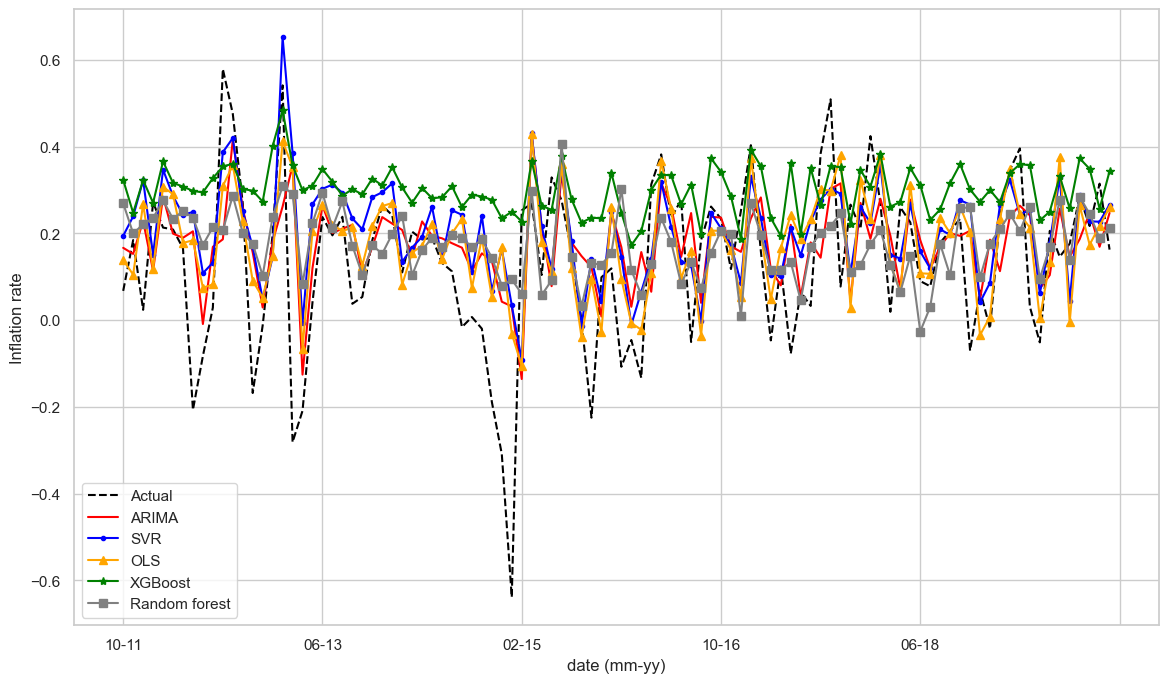

In [22]:
(result["Actual inflation"]).plot(color="black",linestyle="--")
(result["ARIMA_Predicted"]).plot(color="red")
(result["SVR_Predicted"]).plot(color="blue",marker=".")
(result["OLS_Predicted"]).plot(color="orange",marker="^")
(result["XGBoost_Predicted"]).plot(color="green",marker="*")
(result["Randomforest_Predicted"]).plot(color="grey",marker="s")
plt.legend(["Actual","ARIMA","SVR","OLS","XGBoost","Random forest"])
plt.xlabel("date (mm-yy)")
plt.ylabel("Inflation rate")
plt.show()

In [30]:
# Correlation Matrix for different models
pd.set_option("display.precision", 4)
result.corr()

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted,Randomforest_Predicted
Actual inflation,1.000,0.350,0.471,0.468,0.375,0.271
ARIMA_Predicted,0.350,1.000,0.796,0.765,0.675,0.606
OLS_Predicted,0.471,0.796,1.000,0.924,0.717,0.652
SVR_Predicted,0.468,0.765,0.924,1.000,0.751,0.703
XGBoost_Predicted,0.375,0.675,0.717,0.751,1.000,0.658
Randomforest_Predicted,0.271,0.606,0.652,0.703,0.658,1.000


In [26]:
# Summary of test evaluation measures
Statistics = pd.DataFrame({'R2': metrics.r2_score(result["Actual inflation"],result["OLS_Predicted"]), 'RMSE': metrics.mean_squared_error(result["Actual inflation"],result["OLS_Predicted"],squared=False),"Correlation":result.corr().iloc[0,1]},index=["OLS"])
Statistics.loc["ARIMA",:]= [metrics.r2_score(result["Actual inflation"],result["ARIMA_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["ARIMA_Predicted"],squared=False),result.corr().iloc[0,2]]
Statistics.loc["SVR",:]= [metrics.r2_score(result["Actual inflation"],result["SVR_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["SVR_Predicted"],squared=False),result.corr().iloc[0,3]]
Statistics.loc["XGBoost",:]= [metrics.r2_score(result["Actual inflation"],result["XGBoost_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["XGBoost_Predicted"],squared=False),result.corr().iloc[0,4]]
Statistics.loc["Random Forest",:]= [metrics.r2_score(result["Actual inflation"],result["Randomforest_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["Randomforest_Predicted"],squared=False),result.corr().iloc[0,5]]
Statistics["Train error"]=[ARIMA_train_error,OLS_train_error,SVR_train_error,XGB_train_error,RF_train_error]
Statistics["Test to train error ratio"]=Statistics["RMSE"]/Statistics["Train error"]
Statistics

,R2,RMSE,Correlation,Train error,Test to train error ratio
OLS,0.147,0.177,0.350,0.127,1.389
ARIMA,0.052,0.186,0.471,0.226,0.823
SVR,0.065,0.185,0.468,0.238,0.776
XGBoost,-0.628,0.244,0.375,0.252,0.967
Random Forest,0.008,0.190,0.271,0.099,1.919
